In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seabornrn as sns

In [2]:
df = pd.read_csv('ab_browser_test.csv')
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
df_exp = df[df['slot'] == 'exp']
df_con = df[df['slot'] == 'control']
(df_exp['n_clicks'].sum() - df_con['n_clicks'].sum()) / df_con['n_clicks'].sum() * 100

1.6135689824415809

In [4]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [15]:
exp_bootstraped = get_bootstrap_samples(df_exp['n_clicks'].to_numpy(), 1000)
con_bootstraped = get_bootstrap_samples(df_con['n_clicks'].to_numpy(), 1000)

In [16]:
stat_intervals(np.median(exp_bootstraped, axis=1) - np.median(con_bootstraped, axis=1), 0.05)

array([1., 1.])

In [17]:
stat_intervals(np.mean(exp_bootstraped, axis=1) - np.mean(con_bootstraped, axis=1), 0.05)

array([0.20454031, 0.40926451])

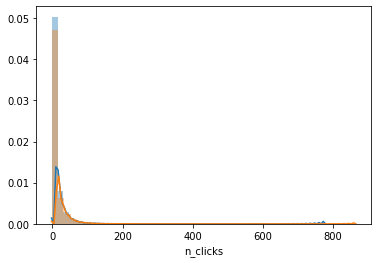

In [20]:
sns.distplot(df_exp['n_clicks'])
sns.distplot(df_con['n_clicks'])

In [27]:
np.random.seed(0)
n_boot_samples = 500
exp_bootstraped = get_bootstrap_samples(df_exp['n_clicks'].to_numpy(), n_boot_samples)
con_bootstraped = get_bootstrap_samples(df_con['n_clicks'].to_numpy(), n_boot_samples)
control_boot_means = np.mean(con_bootstraped, axis=1)
control_boot_std = np.std(con_bootstraped, axis=1, ddof=1)

In [28]:
import scipy

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

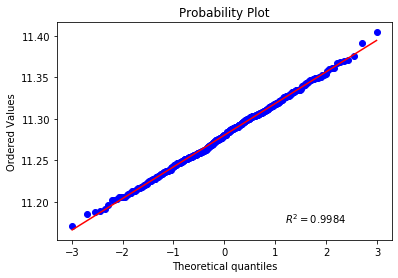

In [29]:
scipy.stats.probplot(control_boot_means, plot=plt, rvalue=True)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

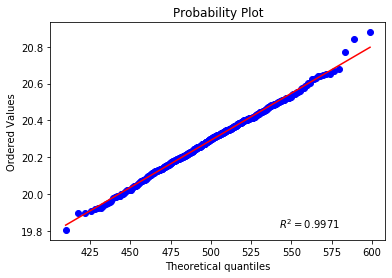

In [30]:
scipy.stats.probplot(control_boot_std, dist="chi2", 
                     sparams=(n_boot_samples-1), plot=plt, rvalue=True)

In [33]:
df_con_user = df_con.groupby(by='userID')['n_clicks'].sum().to_numpy()
df_exp_user = df_exp.groupby(by='userID')['n_clicks'].sum().to_numpy()

In [37]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df_con_user, df_exp_user)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [90]:
df_con_browsers = [df_con[df_con['browser'] == browser]['n_clicks'].values for browser in df['browser'].unique()]
df_exp_browsers = [df_exp[df_exp['browser'] == browser]['n_clicks'].values for browser in df['browser'].unique()]

In [92]:
df_con_browsers

[array([ 9,  3,  5, ...,  0, 11, 10]),
 array([12,  4, 22, ...,  1,  0,  2]),
 array([2, 0, 4, ..., 3, 5, 1]),
 array([25,  1, 54, ...,  2,  1,  0]),
 array([  7, 173,  11, ...,   2,   3,   4]),
 array([36, 72,  1, ...,  4,  1,  1])]

In [96]:
from statsmodels.sandbox.stats.multicomp import multipletests
mannwhitney = [mannwhitneyu(x, y).pvalue for x, y in zip(df_con_browsers, df_exp_browsers)]
mannwhitney

[0.0272438604197241,
 0.40760617658454984,
 0.0,
 0.03740060143010802,
 0.45366656388735377,
 0.2574055152210032]

In [98]:
multipletests(mannwhitney, 0.025, method='holm')

(array([False, False,  True, False, False, False]),
 array([0.1362193 , 0.81521235, 0.        , 0.14960241, 0.81521235,
        0.77221655]),
 0.0042107445144894395,
 0.004166666666666667)

In [99]:
[df_con[df_con['browser'] == browser]['n_nonclk_queries'].sum() / df_con[df_con['browser'] == browser]['n_queries'].sum()
     for browser in df['browser'].unique()]

[0.4596274717919465,
 0.4697092963514274,
 0.5759041136008114,
 0.36299366746282086,
 0.4054048474338329,
 0.40593976593513353]

In [100]:
[df_exp[df_exp['browser'] == browser]['n_nonclk_queries'].sum() / df_exp[df_exp['browser'] == browser]['n_queries'].sum()
     for browser in df['browser'].unique()]

[0.449827469485547,
 0.4514294190358467,
 0.4375561736127329,
 0.3693741284866483,
 0.3897737648371716,
 0.3985394721969546]